In [1]:
import glob
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

plt.style.use("ggplot")

# Compare RADR modelled discharge to observed data for major Arctic rivers

# 1. Read in daily joined RADR and ArcticGRO data

In [3]:
df = pd.read_csv(r"/home/jovyan/shared/pan_arctic_data/discharge/RADR_vs_ArcticGRO.csv", index_col=0)
df.head()

,date,site,q_m3ps_obs,q_m3ps_radr,month
3288,1993-01-01,Indigirka,4.62,79.848,1
3289,1993-01-02,Indigirka,4.48,78.030,1
3290,1993-01-03,Indigirka,4.34,76.291,1
3291,1993-01-04,Indigirka,4.20,74.625,1
3292,1993-01-05,Indigirka,4.06,73.029,1


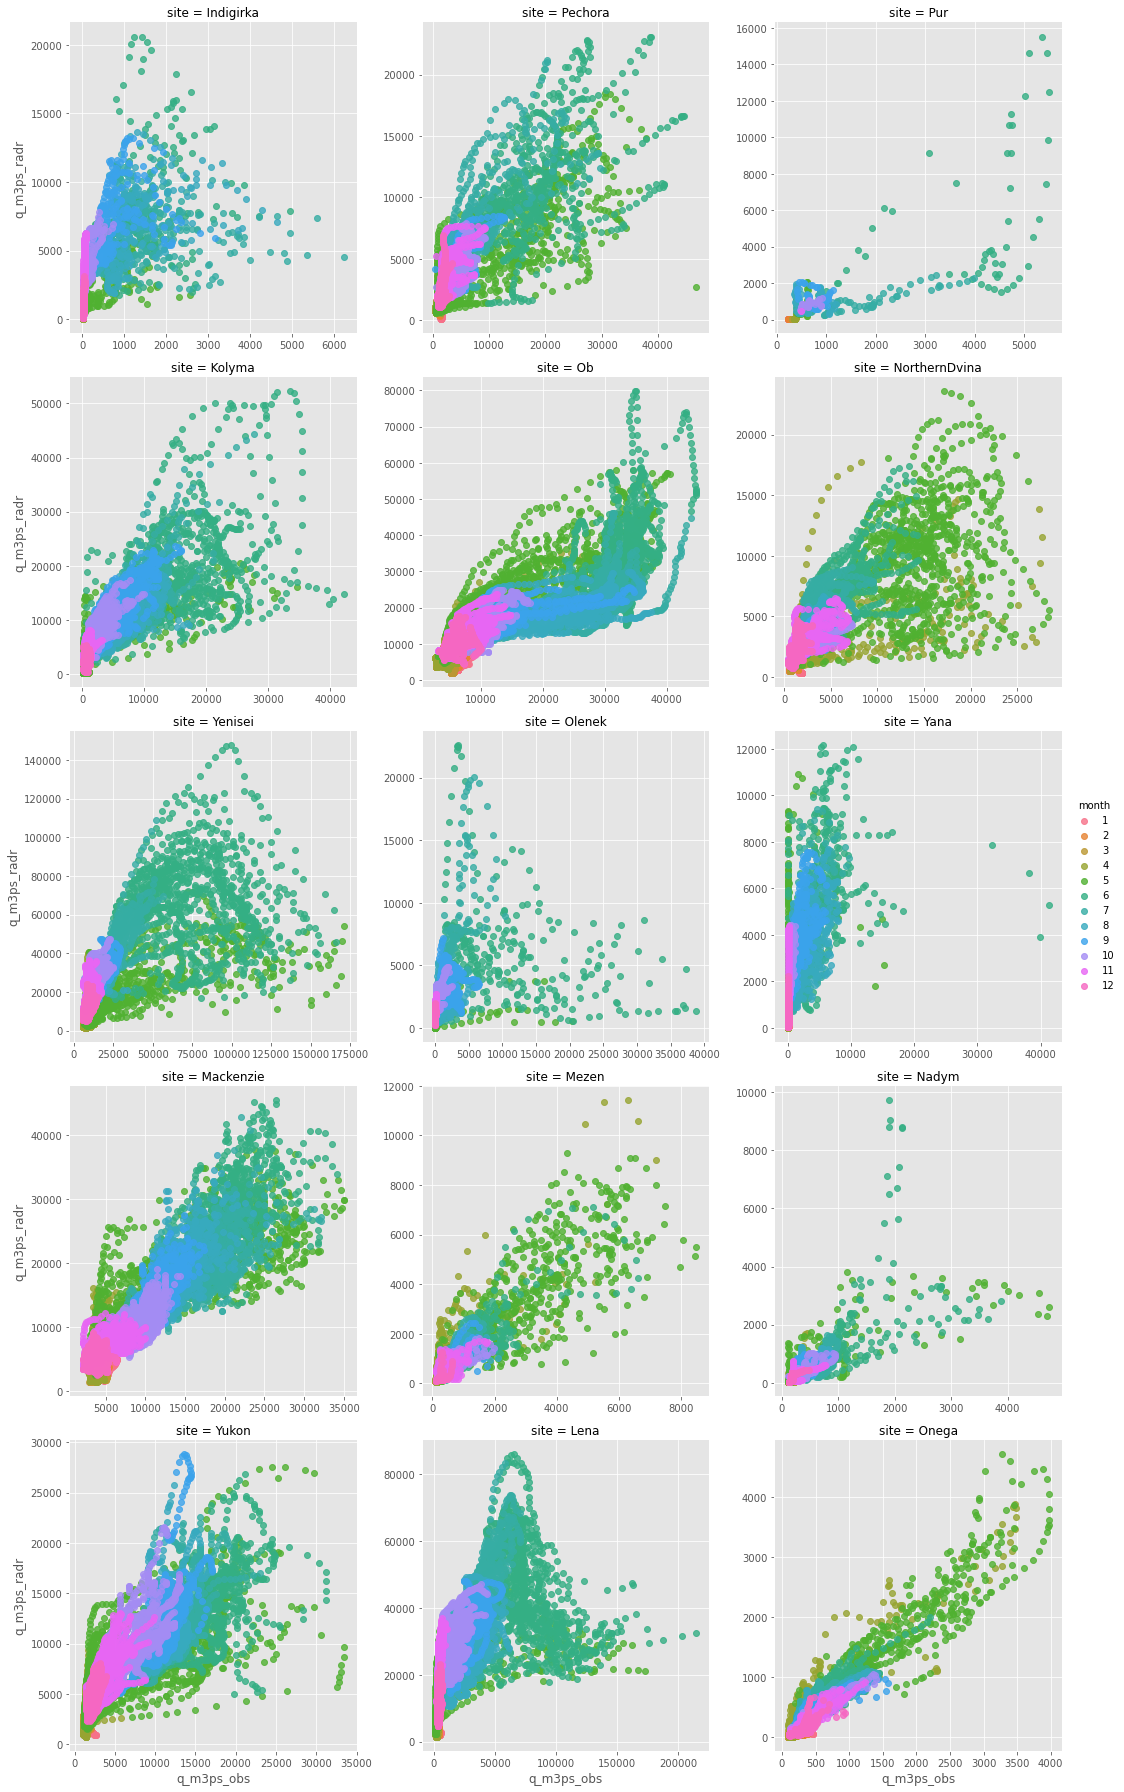

In [4]:
# Scatter plot with points coloured by month
sn.lmplot(
    data=df,
    x="q_m3ps_obs",
    y="q_m3ps_radr",
    hue="month",
    fit_reg=False,
    col="site",
    col_wrap=3,
    aspect=1,
    facet_kws={"sharex": False, "sharey": False},
)

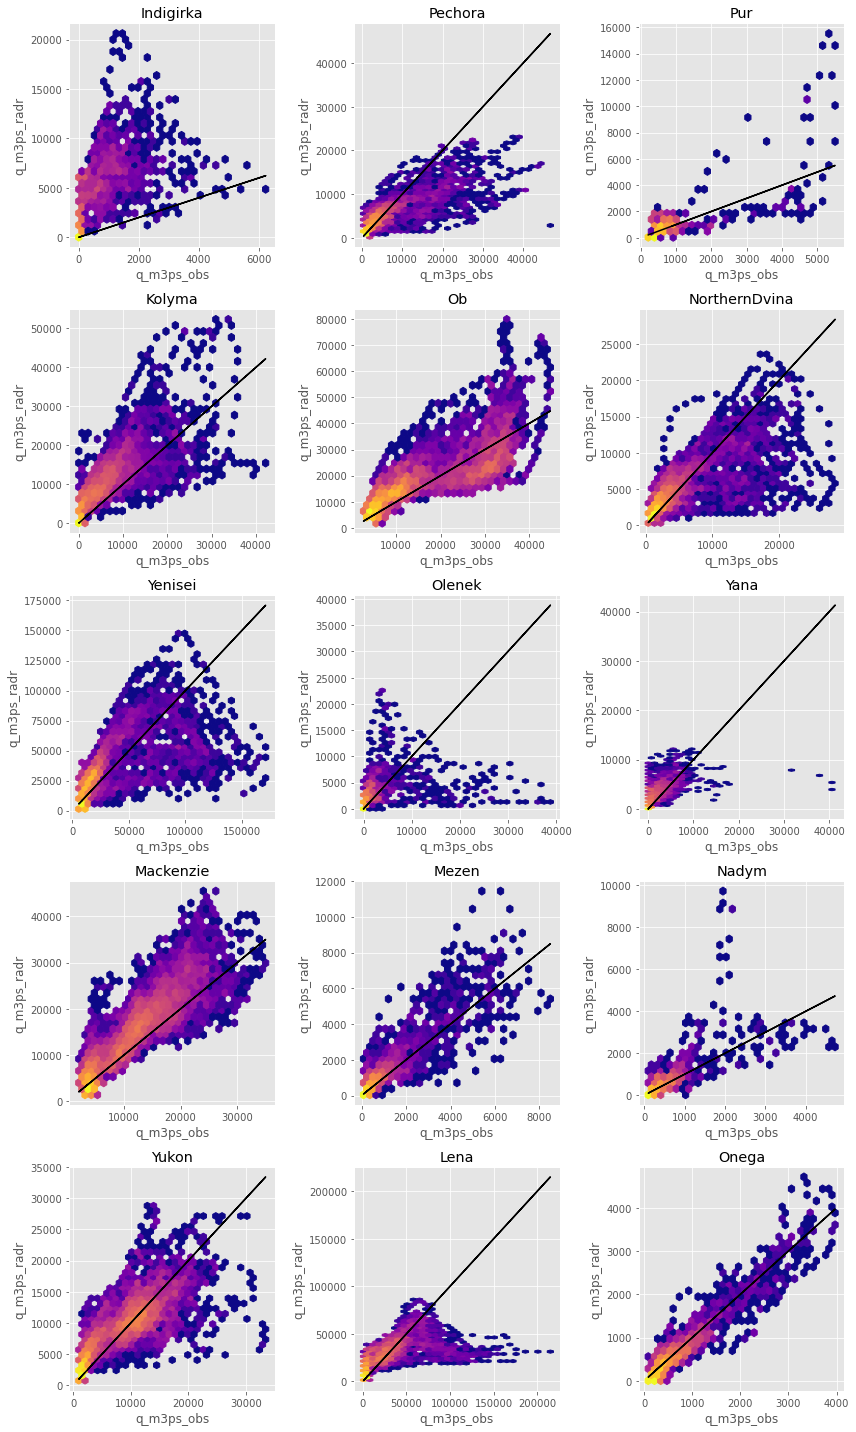

In [5]:
# Hexbin plot to reduce noise
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 20))
axes = axes.flatten()

for idx, site in enumerate(df["site"].unique()):
    df2 = df.query("site == @site")
    axes[idx].hexbin(
        data=df2,
        x="q_m3ps_obs",
        y="q_m3ps_radr",
        gridsize=30,
        bins="log",
        cmap="plasma",
    )
    axes[idx].plot(df2["q_m3ps_obs"], df2["q_m3ps_obs"], "k-")
    axes[idx].set_title(site)
    axes[idx].set_xlabel("q_m3ps_obs")
    axes[idx].set_ylabel("q_m3ps_radr")
plt.tight_layout()

In [19]:
df2.head()

,date,site,q_m3ps_obs,q_m3ps_radr,month
153408,1984-01-01,Yukon,1954.0,3950.173,1
153409,1984-01-02,Yukon,1926.0,3950.173,1
153410,1984-01-03,Yukon,1897.0,3899.138,1
153411,1984-01-04,Yukon,1869.0,3850.271,1
153412,1984-01-05,Yukon,1841.0,3803.261,1


<AxesSubplot:xlabel='date'>

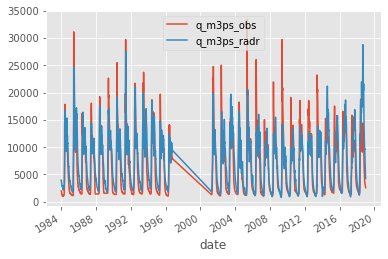

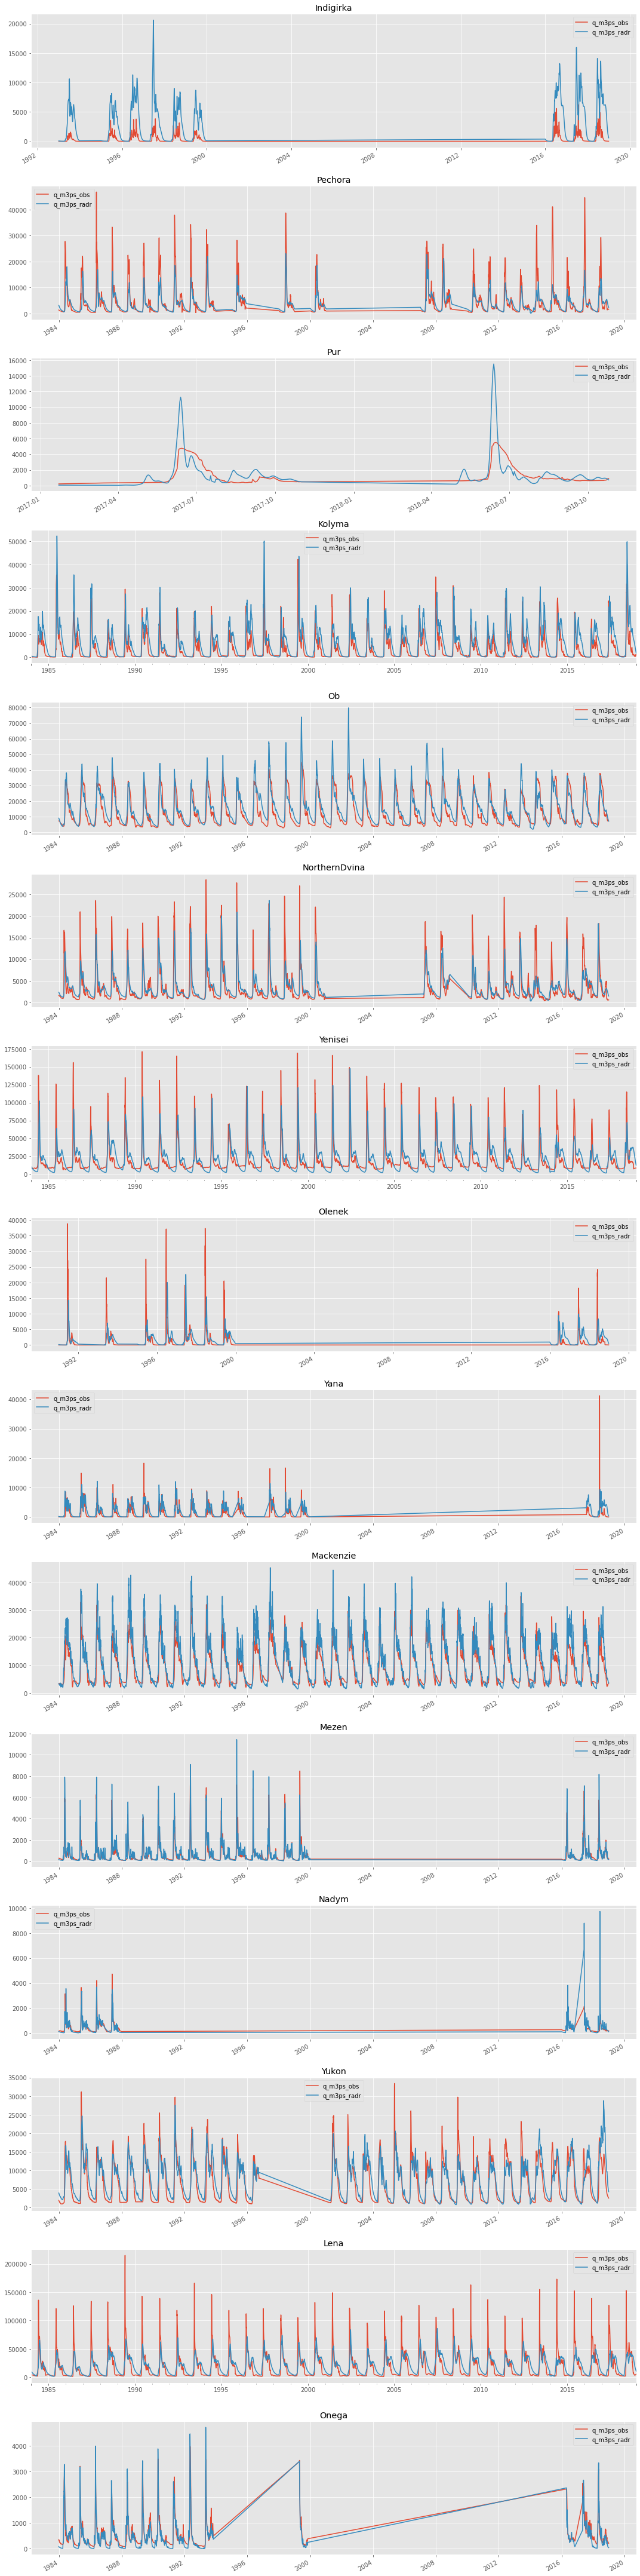

In [35]:
# Timeseries
site_list = df["site"].unique()

fig, axes = plt.subplots(nrows=len(site_list), ncols=1, figsize=(15, 60))

for idx, site in enumerate(site_list):
    ax = axes[idx]
    df2 = df.loc[df['site'] == site]

    df2 = df2.set_index('date')
    df2.index = pd.to_datetime(df2.index)
    df2.drop('month', axis=1, inplace=True)

    df2.plot(ax=ax)

    ax.set_title(site)
    ax.xaxis.label.set_visible(False)

plt.tight_layout()
plt.show()